# Homework 5. Pandas - Titanic

***Double Click here to edit this cell***

- Name: 전기범
- Student ID: 201703091
- Submission date: 2019/05/02

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic_dataset.csv')

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- name: Name 
- sex: {'male', 'female'} 
- age: Age
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
- boat: boat # of survived passengers

## Problem 1. Find mean fare that the first class passengers paid (In Korean current currency) (5 pts)
- Note that there are many unpaid free passengers. They are out of consideration.
- 1 pound when Titanic launched is worth 57.5 US dollars. 
- Suppose US currency exchange ratio is 1141 won per dollar.
- Before printing, truncate to two decimal places (소수점 이하 두자리)

In [3]:
# YOUR CODE HERE
# 0원 이상, fair 모두 더해서 min, 평균 계산
import numpy as np
fare=titanic.loc[(titanic['pclass']==1) & (titanic['fare']>0),['fare']]['fare']
print("mean fare that the first class passengers paid = %.2f"%(np.mean(fare)*57.5*1141))

mean fare that the first class passengers paid = 5868425.67


```
mean fare that the first class passengers paid = 5868425.67
```

## Problem 2. (15 pts)
### 2.1 Find the **name**s who paid the highest **fare**. Are they **survived**?

In [4]:
# YOUR CODE HERE
maxFare=titanic.loc[(titanic['survived']==1) & (titanic['pclass']==1),['fare']].max()
print(titanic.loc[(titanic['fare']==maxFare[0]),['name','survived']])

                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1


```
                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1
```

### 2.2 Find the **name**s who paid the lowest **fare**. Are they **survived**?

In [5]:
# YOUR CODE HERE
minFare=titanic.fare.min()
print(titanic.loc[(titanic['fare']==minFare),['name','pclass','survived']])

                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963     

```
                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963                     Leonard, Mr. Lionel       3         0
1254           Tornquist, Mr. William Henry       3         1
```

### 2.3 Find the **name**s who paid the lowest **fare** (> 0). Are they **survived**?

In [6]:
# YOUR CODE HERE
minFare=titanic.loc[(titanic['fare']>0) & (titanic['survived']==1),['fare']].min()
print(titanic.loc[(titanic['fare']==minFare[0]),['name','pclass','survived']])

                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1


```
                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1
```

## Problem 3. (10 pts)
### 3.1 Find the survival ratio who paid more than 0 and less than or equal to the mean fare of third class

In [7]:
# YOUR CODE HERE
fareMean = titanic.loc[(titanic['pclass']==3) & (titanic['fare']>0)].fare.mean()
fareMore = titanic.loc[(titanic['fare']>0) & (titanic['fare']<=fareMean)]
fareSurvived = titanic.loc[(titanic['survived']==1) & (titanic['fare']>0) & (titanic['fare']<=fareMean)]
print("survived ratio of low 1 group = %.2f%%"%float(len(fareSurvived)/len(fareMore)*100))

survived ratio of low 1 group = 25.33%


```
survived ratio of low 1 group = 25.33%
```

### 3.2 Find the survival ratio who paid more than the mean fare of first class

In [8]:
# YOUR CODE HERE
fareMean = titanic.loc[titanic['pclass']==1].fare.mean()
firstMore = titanic.loc[(titanic['fare']>fareMean)]
firstMoreSurvived = titanic.loc[(titanic['survived']==1) & (titanic['fare']>fareMean)]
print("survived ratio of high 1 group = %.2f%%"%float(len(firstMoreSurvived)/len(firstMore)*100))

survived ratio of high 1 group = 72.16%


```
survived ratio of high 1 group = 72.16%
```

## Problem 4. (10 pts)
### 4.1 Plot the number of male and female passengers

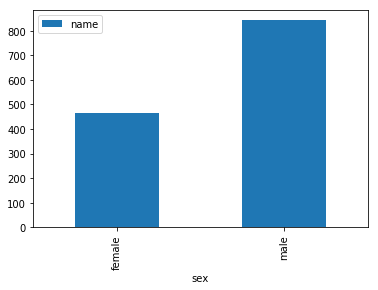

In [10]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

def plot_sex():
    plt.bar(np.arange(len(passNumber)),passNumber,width=0.5,label='name')
    plt.xticks([i for i, _ in enumerate(passNumber)], sex,rotation=90)
    plt.xlabel('sex')
    plt.legend(fontsize=10)
    plt.xlim(-0.5,1.5)
    plt.show()

sex = set(titanic.sex.values)
passNumber=tuple(titanic['sex'].value_counts())[::-1]
plot_sex()

<img src="hw5_1.png">

### 4.2 Plot mean age and mean fare by sex

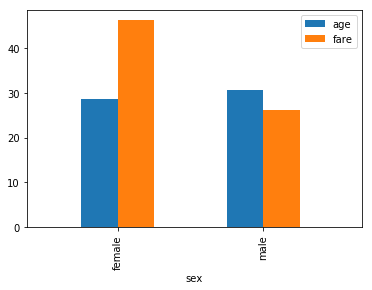

In [11]:
# YOUR CODE HERE
def plot_means():
    bar_width = 0.25
    plt.bar(np.arange(len(age)), age, bar_width, label='age')
    plt.bar(np.arange(len(fare))+bar_width, fare, width=0.25, label='fare')
    plt.xticks([i+bar_width/2 for i, _ in enumerate(passNumber)], sex,rotation=90)
    plt.xlabel('sex')
    plt.legend(fontsize=10)
    plt.xlim(-0.5,1.8)
    plt.show()
    
male, female = titanic.loc[titanic['sex']=='male'], titanic.loc[titanic['sex']=='female']
age = (female.age.mean(), male.age.mean())
fare = (female.fare.mean(), male.fare.mean())
plot_means()

<img src="hw5_2.png">

## Problem 5. (10 pts)
### 5.1 Find the number of passengers by passenger's title.

In [12]:
# YOUR CODE HERE
title=['Mr.','Miss.','Mrs.','Master.','Rev.','Dr.','Col.','Ms.','Major.','Jonkheer.','Capt.','Countess.','Lady.','Don.','Mme.','Dona.']



```
 Mr.          757
 Miss.        260
 Mrs.         197
 Master.       61
 Rev.           8
 Dr.            8
 Col.           4
 Ms.            2
 Mlle.          2
 Major.         2
 Jonkheer.      1
 Sir.           1
 Capt.          1
 Countess.      1
 Lady.          1
 Don.           1
 Mme.           1
 Dona.          1
Name: name, dtype: int64
```

### 5.2 Plot the mean fare by passenger's title

In [ ]:
# YOUR CODE HERE


<img src="hw5_3.png">

## Problem 6. (15 pts)
### Compute the confidence and support for the following cases:

#조건부 확률

Confidences:
- P(survived = 1 | sex=female, pclass=1)
- P(survived = 1 | sex=female, pclass=2)
- P(survived = 1 | sex=female, pclass=3)
- P(survived = 1 | sex=male, pclass=1)
- P(survived = 1 | sex=male, pclass=2)
- P(survived = 1 | sex=male, pclass=3)
- P(survived = 1 | age <= 10, pclass=1)
- P(survived = 1 | age <= 10, pclass=2)
- P(survived = 1 | age <= 10, pclass=3)

Support:
- P(survived = 1, sex=female, pclass=1)
- P(survived = 1, sex=female, pclass=2)
- P(survived = 1, sex=female, pclass=3)
- P(survived = 1, sex=male, pclass=1)
- P(survived = 1, sex=male, pclass=2)
- P(survived = 1, sex=male, pclass=3)
- P(survived = 1, age <= 10, pclass=1)
- P(survived = 1, age <= 10, pclass=2)
- P(survived = 1, age <= 10, pclass=3)

### 6.1 P(survived = 1 | sex=female, pclass=1), P(survived = 1, sex=female, pclass=1)

In [13]:
# YOUR CODE HERE
C = titanic.loc[(titanic['sex']=='female') & (titanic['pclass']==1)]
S = titanic.loc[(titanic['survived']==1) & (titanic['sex']=='female') & (titanic['pclass']==1)]
print("Confidence: P(survived = 1 | sex=female, pclass=1) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, sex=female, pclass=1) = %.2f"%(len(S)/len(titanic)*100))

Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53
Support: P(survived = 1, sex=female, pclass=1) = 10.62


```
Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53
Support: P(survived = 1, sex=female, pclass=1) = 10.62
```

### 6.2 P(survived = 1 | sex=female, pclass=2), P(survived = 1, sex=female, pclass=2)

In [14]:
# YOUR CODE HERE
C = titanic.loc[(titanic['sex']=='female') & (titanic['pclass']==2)]
S = titanic.loc[(titanic['survived']==1) & (titanic['sex']=='female') & (titanic['pclass']==2)]
print("Confidence: P(survived = 1 | sex=female, pclass=2) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, sex=female, pclass=2) = %.2f"%(len(S)/len(titanic)*100))

Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68
Support: P(survived = 1, sex=female, pclass=2) = 7.18


```
Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68
Support: P(survived = 1, sex=female, pclass=2) = 7.18
```

### 6.3 P(survived = 1 | sex=female, pclass=3), P(survived = 1, sex=female, pclass=3)

In [15]:
# YOUR CODE HERE
C = titanic.loc[(titanic['sex']=='female') & (titanic['pclass']==3)]
S = titanic.loc[(titanic['survived']==1) & (titanic['sex']=='female') & (titanic['pclass']==3)]
print("Confidence: P(survived = 1 | sex=female, pclass=3) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, sex=female, pclass=3) = %.2f"%(len(S)/len(titanic)*100))

Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07
Support: P(survived = 1, sex=female, pclass=3) = 8.10


```
Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07
Support: P(survived = 1, sex=female, pclass=3) = 8.10
```

### 6.4 P(survived = 1 | sex=male, pclass=1), P(survived = 1, sex=male, pclass=1)

In [16]:
# YOUR CODE HERE
C = titanic.loc[(titanic['sex']=='male') & (titanic['pclass']==1)]
S = titanic.loc[(titanic['survived']==1) & (titanic['sex']=='male') & (titanic['pclass']==1)]
print("Confidence: P(survived = 1 | sex=male, pclass=1) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, sex=male, pclass=1) = %.2f"%(len(S)/len(titanic)*100))

Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08
Support: P(survived = 1, sex=male, pclass=1) = 4.66


```
Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08
Support: P(survived = 1, sex=male, pclass=1) = 4.66
```

### 6.5 P(survived = 1 | sex=male, pclass=2), P(survived = 1, sex=male, pclass=2)

In [17]:
# YOUR CODE HERE
C = titanic.loc[(titanic['sex']=='male') & (titanic['pclass']==2)]
S = titanic.loc[(titanic['survived']==1) & (titanic['sex']=='male') & (titanic['pclass']==2)]
print("Confidence: P(survived = 1 | sex=male, pclass=2) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, sex=male, pclass=2) = %.2f"%(len(S)/len(titanic)*100))

Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62
Support: P(survived = 1, sex=male, pclass=2) = 1.91


```
Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62
Support: P(survived = 1, sex=male, pclass=2) = 1.91
```

### 6.6 P(survived = 1 | sex=male, pclass=3), P(survived = 1, sex=male, pclass=3)

In [18]:
# YOUR CODE HERE
C = titanic.loc[(titanic['sex']=='male') & (titanic['pclass']==3)]
S = titanic.loc[(titanic['survived']==1) & (titanic['sex']=='male') & (titanic['pclass']==3)]
print("Confidence: P(survived = 1 | sex=male, pclass=3) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, sex=male, pclass=3) = %.2f"%(len(S)/len(titanic)*100))

Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21
Support: P(survived = 1, sex=male, pclass=3) = 5.73


```
Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21
Support: P(survived = 1, sex=male, pclass=3) = 5.73
```

### 6.7 P(survived = 1 | age <= 10, pclass=1), P(survived = 1,  age <= 10, pclass=1)

In [19]:
# YOUR CODE HERE
C = titanic.loc[(titanic['age']<=10) & (titanic['pclass']==1)]
S = titanic.loc[(titanic['survived']==1) & (titanic['age']<=10) & (titanic['pclass']==1)]
print("Support: P(survived = 1 | age <= 10, pclass=1) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, age <= 10, pclass=1) = %.2f"%(len(S)/len(titanic)*100))

Support: P(survived = 1 | age <= 10, pclass=1) = 75.00
Support: P(survived = 1, age <= 10, pclass=1) = 0.23


```
Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.00
Support: P(survived = 1, age <= 10, pclass=1) = 0.23
```

### 6.8 P(survived = 1 | age <= 10, pclass=2), P(survived = 1,  age <= 10, pclass=2)

In [20]:
# YOUR CODE HERE
C = titanic.loc[(titanic['age']<=10) & (titanic['pclass']==2)]
S = titanic.loc[(titanic['survived']==1) & (titanic['age']<=10) & (titanic['pclass']==2)]
print("Support: P(survived = 1 | age <= 10, pclass=2) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, age <= 10, pclass=2) = %.2f"%(len(S)/len(titanic)*100))

Support: P(survived = 1 | age <= 10, pclass=2) = 100.00
Support: P(survived = 1, age <= 10, pclass=2) = 1.68


```
Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.00
Support: P(survived = 1, age <= 10, pclass=2) = 1.68
```

### 6.9 P(survived = 1 | age <= 10, pclass=3), P(survived = 1,  age <= 10, pclass=3)

In [21]:
# YOUR CODE HERE
C = titanic.loc[(titanic['age']<=10) & (titanic['pclass']==3)]
S = titanic.loc[(titanic['survived']==1) & (titanic['age']<=10) & (titanic['pclass']==3)]
print("Support: P(survived = 1 | age <= 10, pclass=3) = %.2f"%(len(S)/len(C)*100))
print("Support: P(survived = 1, age <= 10, pclass=3) = %.2f"%(len(S)/len(titanic)*100))

Support: P(survived = 1 | age <= 10, pclass=3) = 41.67
Support: P(survived = 1, age <= 10, pclass=3) = 1.91


```
Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67
Support: P(survived = 1, age <= 10, pclass=3) = 1.91
```

### 6.10 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)

<p>좌석의 등급이 높을수록, 남자보다 여자가, 어린 아이보다 성인이 살 확률이 더 높다는것을 알게 되었습니다


## Problem 7. (10 pts)
### 7.1 Plot numbers of survived and numbers of dead by passenger classes

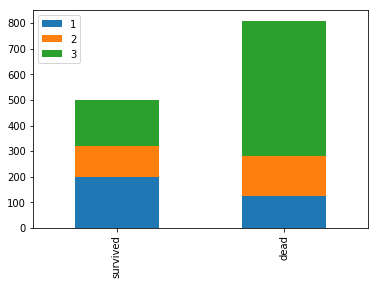

In [22]:
# YOUR CODE HERE
def plot_survive():
    bars = np.add(pclass1, pclass2).tolist()
    plt.bar(np.arange(len(pclass1)),pclass1,width=0.5,label=1)
    plt.bar(np.arange(len(pclass2)),pclass2,bottom=pclass1,width=0.5,label=2)
    plt.bar(np.arange(len(pclass3)),pclass3,bottom=bars,width=0.5,label=3)
    plt.xticks([i for i, _ in enumerate(labels)], labels,rotation=90)
    plt.legend(fontsize=10)
    plt.xlim(-0.5,1.5)
    plt.show()

pclass1 = (len(titanic.loc[(titanic['survived']==1) & (titanic['pclass']==1)]),
           len(titanic.loc[(titanic['survived']==0) & (titanic['pclass']==1)]))
pclass2 = (len(titanic.loc[(titanic['survived']==1) & (titanic['pclass']==2)]),
           len(titanic.loc[(titanic['survived']==0) & (titanic['pclass']==2)]))
pclass3 = (len(titanic.loc[(titanic['survived']==1) & (titanic['pclass']==3)]),
           len(titanic.loc[(titanic['survived']==0) & (titanic['pclass']==3)]))
labels = ('survived','dead')
plot_survive()

<img src="hw5_4.png">

### 7.2 Plot numbers of survived and numbers of dead by passenger age intervals
-  0:   0 $\le$ age $\lt$ 20
- 20: 20 $\le$ age $\lt$ 40
- 40: 40 $\le$ age $\lt$ 60
- 60: 60 $\le$ age $\lt$ 80
- 80: 80 $\le$ age

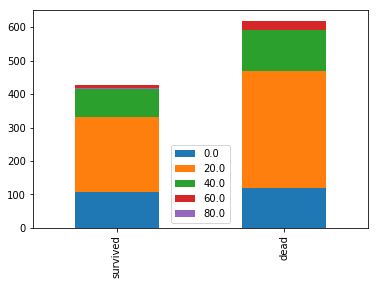

In [23]:
# YOUR CODE HERE
def plot_survive():
    bars = np.add(a0, a20).tolist()
    bars2 = np.add(bars, a40).tolist()
    bars3 = np.add(bars2, a80).tolist()
    plt.bar(np.arange(len(a0)),a0,width=0.5,label=0.0)
    plt.bar(np.arange(len(a20)),a20,bottom=a0,width=0.5,label=20.0)
    plt.bar(np.arange(len(a40)),a40,bottom=bars,width=0.5,label=40.0)
    plt.bar(np.arange(len(a60)),a60,bottom=bars2,width=0.5,label=60.0)
    plt.bar(np.arange(len(a80)),a80,bottom=bars3,width=0.5,label=80.0)
    plt.xticks([i for i, _ in enumerate(labels)], labels,rotation=90)
    plt.legend(fontsize=10,loc='lower center')
    plt.xlim(-0.5,1.5)
    plt.show()

a0 = (len(titanic.loc[(titanic['survived']==1) & (titanic['age']>=0) & (titanic['age']<20)]),
      len(titanic.loc[(titanic['survived']==0) & (titanic['age']>=0) & (titanic['age']<20)]))
a20 = (len(titanic.loc[(titanic['survived']==1) & (titanic['age']>=20) & (titanic['age']<40)]),
       len(titanic.loc[(titanic['survived']==0) & (titanic['age']>=20) & (titanic['age']<40)]))
a40 = (len(titanic.loc[(titanic['survived']==1) & (titanic['age']>=40) & (titanic['age']<60)]),
       len(titanic.loc[(titanic['survived']==0) & (titanic['age']>=40) & (titanic['age']<60)]))
a60 = (len(titanic.loc[(titanic['survived']==1) & (titanic['age']>=60) & (titanic['age']<80)]),
       len(titanic.loc[(titanic['survived']==0) & (titanic['age']>=60) & (titanic['age']<80)]))
a80 = (len(titanic.loc[(titanic['survived']==1) & (titanic['age']>=80)]),
       len(titanic.loc[(titanic['survived']==0) & (titanic['age']>=80)]))
labels = ('survived','dead')
plot_survive()

<img src="hw5_5.png">

### 7.3 Plot numbers of survived and numbers of dead by the ports passenger embarked at

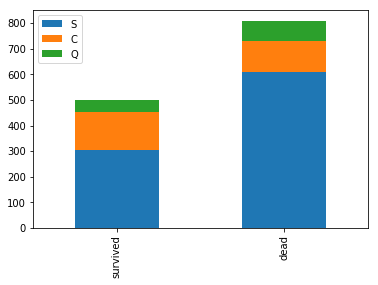

In [24]:
# YOUR CODE HERE
def plot_survive():
    bars = np.add(S, C).tolist()
    plt.bar(np.arange(len(S)),S,width=0.5,label='S')
    plt.bar(np.arange(len(C)),C,bottom=S,width=0.5,label='C')
    plt.bar(np.arange(len(Q)),Q,bottom=bars,width=0.5,label='Q')
    plt.xticks([i for i, _ in enumerate(labels)], labels,rotation=90)
    plt.legend(fontsize=10)
    plt.xlim(-0.5,1.5)
    plt.show()

S = (len(titanic.loc[(titanic['survived']==1) & (titanic['embarked']=='S')]),
     len(titanic.loc[(titanic['survived']==0) & (titanic['embarked']=='S')]))
C = (len(titanic.loc[(titanic['survived']==1) & (titanic['embarked']=='C')]),
     len(titanic.loc[(titanic['survived']==0) & (titanic['embarked']=='C')]))
Q = (len(titanic.loc[(titanic['survived']==1) & (titanic['embarked']=='Q')]),
     len(titanic.loc[(titanic['survived']==0) & (titanic['embarked']=='Q')]))
labels = ('survived','dead')
plot_survive()

<img src="hw5_6.png">

### 7.4 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)

3등석에 탑승한 승객의 사망률이 가장높음<br>
20대의 사람들이 구조, 사망한것으로 보아 20대 승객이 많았던것으로 추정<br>
Southampton에서 승선한 사람 중 구조자와 사망자가 많은것으로 보아 Southampton에서 가장 많은 사람들을 승선한것으로 추정


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run all cells
- Goto "File -> Print Preview"
- Print the page
- Submit in class
- No late homeworks accepted
- Your homework will be graded on the basis of correctness and programming skills

## Deadline: 5/2